In [1]:
from cospar import reader, F, paramkeys, datakeys, highlight_case
%matplotlib inline

In [2]:
canvas = highlight_case(1, 1, 10 ** 5.6)

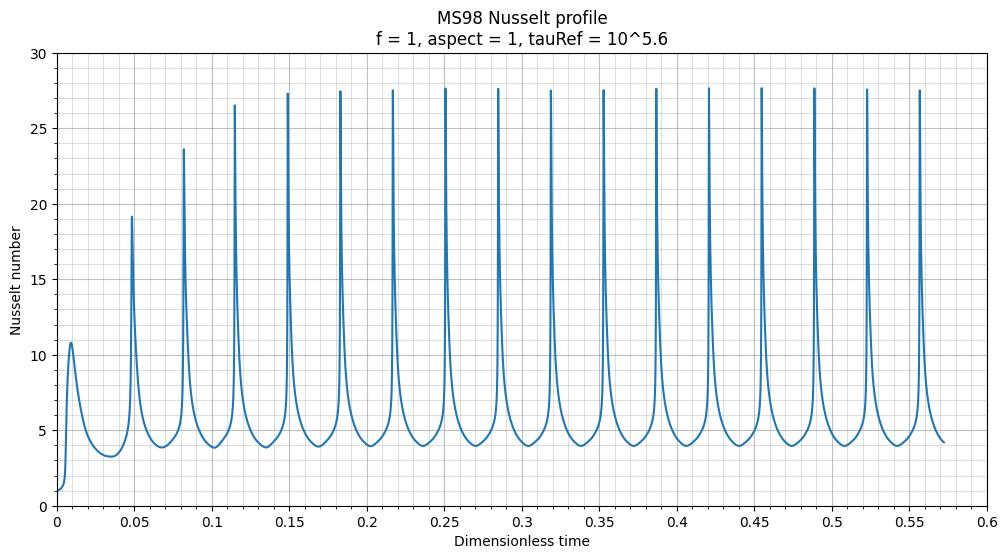

In [3]:
display(canvas.fig)

In [5]:
tFs = dict(zip((1, 2), ('_built_peaskauslu-thoesfthuec', '_built_oiskeaosle-woatihoo')))

In [7]:
cut = reader[(F('f') == 1) & (F('aspect') == 1) & (F('temperatureField') == tFs[1])]

In [13]:
import math
sorted(set(math.log10(v) for v in reader[cut : 'tauRef'].values()))

[4.95,
 5.0,
 5.05,
 5.1,
 5.15,
 5.2,
 5.25,
 5.3,
 5.35,
 5.36,
 5.37,
 5.38,
 5.39,
 5.4,
 5.45,
 5.5,
 5.55,
 5.6,
 5.65,
 5.7,
 5.71,
 5.72,
 5.73,
 5.74,
 5.75,
 5.8,
 5.85,
 5.9,
 5.95,
 6.0,
 6.05]

In [56]:
from everest.window import Canvas
from everest.window.data import Data
from matplotlib.pyplot import get_cmap
cmap = get_cmap('viridis')

def plot_taus(taus, f = 1, aspect = 1, freq = 1, maxt = None):
    normTau = lambda tau: \
        (math.log10(tau) - math.log10(min(taus))) \
        / (math.log10(max(taus)) - math.log10(min(taus)))
    tF = dict(zip((1, 2), ('_built_peaskauslu-thoesfthuec', '_built_oiskeaosle-woatihoo')))[freq]
    cut = reader[
        (F('f') == f) \
        & (F('aspect') == aspect) \
        & (F('temperatureField') == tF) \
        ]
    canvas = Canvas(size = (12, 6))
    ax = canvas.make_ax()
    for tauRef in taus:
        subcut = cut & reader[F('tauRef') == tauRef]
        (t, Nu), *_ = reader[subcut : ('t', 'Nu')].values()
        ax.line(
            Data(t, label = 'Dimensionless time', lims = (None, maxt)),
            Data(Nu, label = 'Nusselt number'),
            c = cmap(normTau(tauRef)),
            )
    ax.grid.colour = 'grey'
    return canvas

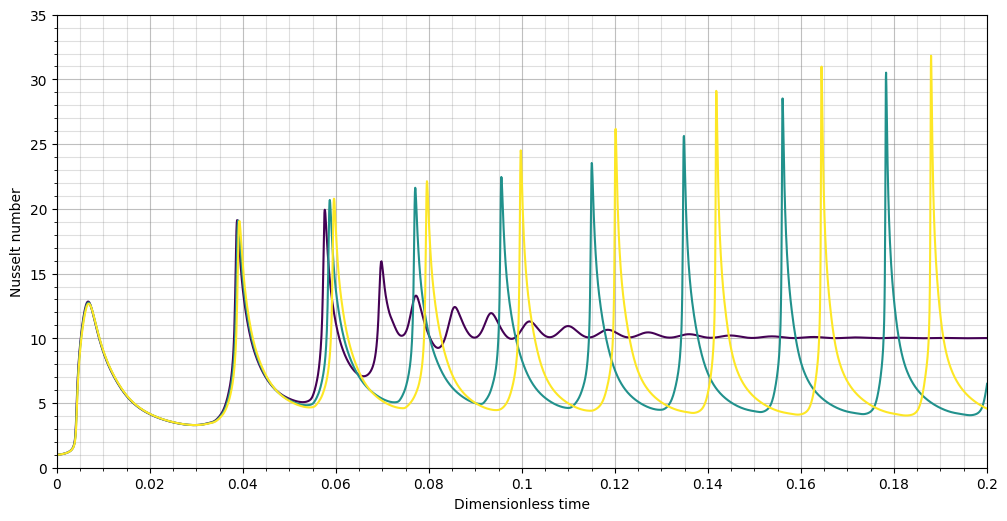

In [57]:
# exps = [5.35, 5.36, 5.37, 5.38, 5.39, 5.4]
exps = [5.35, 5.36, 5.37]
display(plot_taus(
    [10 ** i for i in exps],
    maxt = 0.2,
    ).fig)

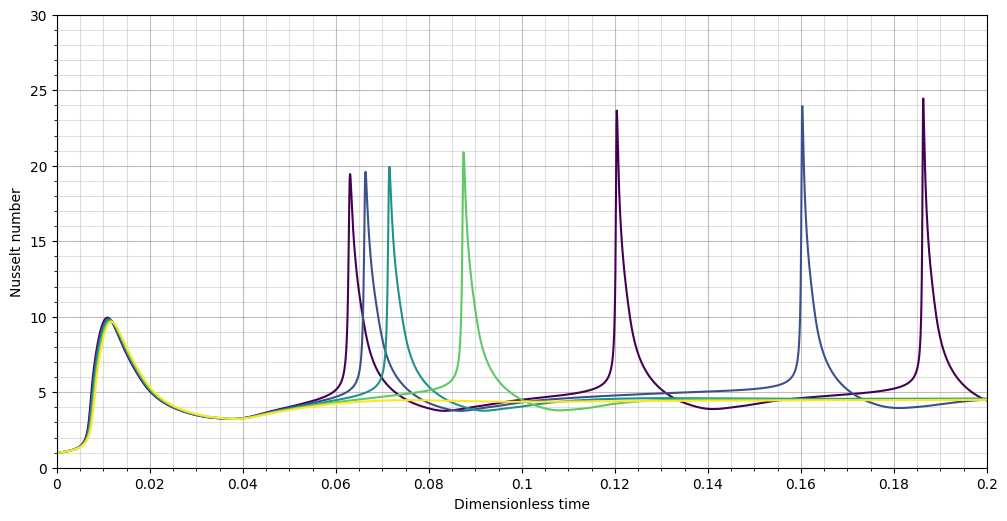

In [58]:
# exps = [5.7, 5.71, 5.72, 5.73, 5.74, 5.75]
exps = [5.71, 5.72, 5.73, 5.74, 5.75]
display(plot_taus(
    [10 ** i for i in exps],
    maxt = 0.2,
    ).fig)